In [2]:
import pandas as pd

In [23]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [4]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads)

200

In [5]:
import numpy as np

In [12]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"]))
#Coofeciente de correlacion de Pearson

In [13]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corr1,corrn
0,230.1,37.8,69.2,22.1,6898.548306,670.896956
1,44.5,39.3,45.1,10.4,10514.964306,371.460206
2,17.2,45.9,69.3,9.3,16859.074806,613.181206
3,151.5,41.3,58.5,18.5,19.869306,19.958456
4,180.8,10.8,58.4,12.9,1139.568806,-37.892794


In [14]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [15]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corr1,corrn
0,230.1,37.8,69.2,22.1,6898.548306,670.896956
1,44.5,39.3,45.1,10.4,10514.964306,371.460206
2,17.2,45.9,69.3,9.3,16859.074806,613.181206
3,151.5,41.3,58.5,18.5,19.869306,19.958456
4,180.8,10.8,58.4,12.9,1139.568806,-37.892794


In [16]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [17]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corr1,corrn,corr2
0,230.1,37.8,69.2,22.1,6898.548306,670.896956,65.246006
1,44.5,39.3,45.1,10.4,10514.964306,371.460206,13.122506
2,17.2,45.9,69.3,9.3,16859.074806,613.181206,22.302006
3,151.5,41.3,58.5,18.5,19.869306,19.958456,20.048006
4,180.8,10.8,58.4,12.9,1139.568806,-37.892794,1.260006


In [15]:
corrn = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [16]:
corrn

0.782224424861606

In [18]:
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [19]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [24]:
cols = data_ads.columns.values

In [25]:
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [27]:
for x in cols:
    for y in cols:
        if x !=y:
            print(x + ", "+ y + " : " + str(corr_coeff(data_ads, x, y)))

TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525


In [28]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

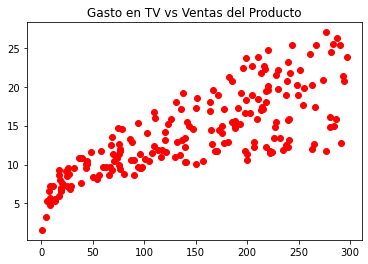

In [29]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5,1,'Gasto en Radio vs Ventas del Producto')

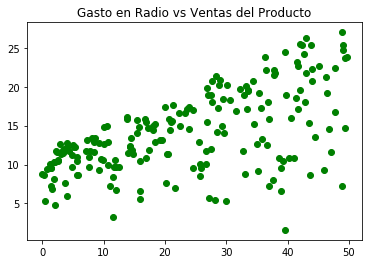

In [33]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5,1,'Gasto en Periódico vs Ventas del Producto')

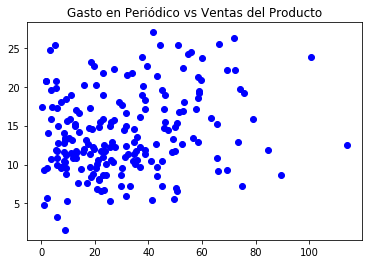

In [34]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periódico vs Ventas del Producto")

In [39]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


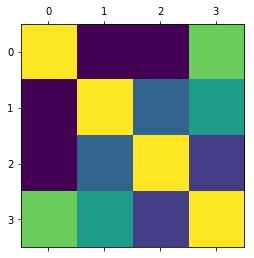

In [40]:
plt.matshow(data_ads.corr())